# Libraries

In [ ]:
#importing library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn import metrics

**Loading Dataset and Pre-Processing**

In [ ]:
# Loading datasets
dataset = pd.read_csv('/content/drive/MyDrive/Big Data Sugar/Diabetes_dataset.csv')
alldata = dataset.count()
# Printing column names for both DataFrames
print(dataset)
# Droping rows with any NA values in specified columns
df = dataset.dropna(subset=['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'])


Diabetes_binary         253680
HighBP                  253680
HighChol                253680
CholCheck               253680
BMI                     253680
Smoker                  253680
Stroke                  253680
HeartDiseaseorAttack    253680
PhysActivity            253680
Fruits                  253680
Veggies                 253680
HvyAlcoholConsump       253680
AnyHealthcare           253680
NoDocbcCost             253680
GenHlth                 253680
MentHlth                253680
PhysHlth                253680
DiffWalk                253680
Sex                     253680
Age                     253680
Education               253680
Income                  253680
dtype: int64
        Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                     0       1         1          1   40       1       0   
1                     0       0         0          0   25       1       0   
2                     0       1         1          1   28       0       0 

**Heatmap of cleaned data**

# Heat Map of Data Cleaning

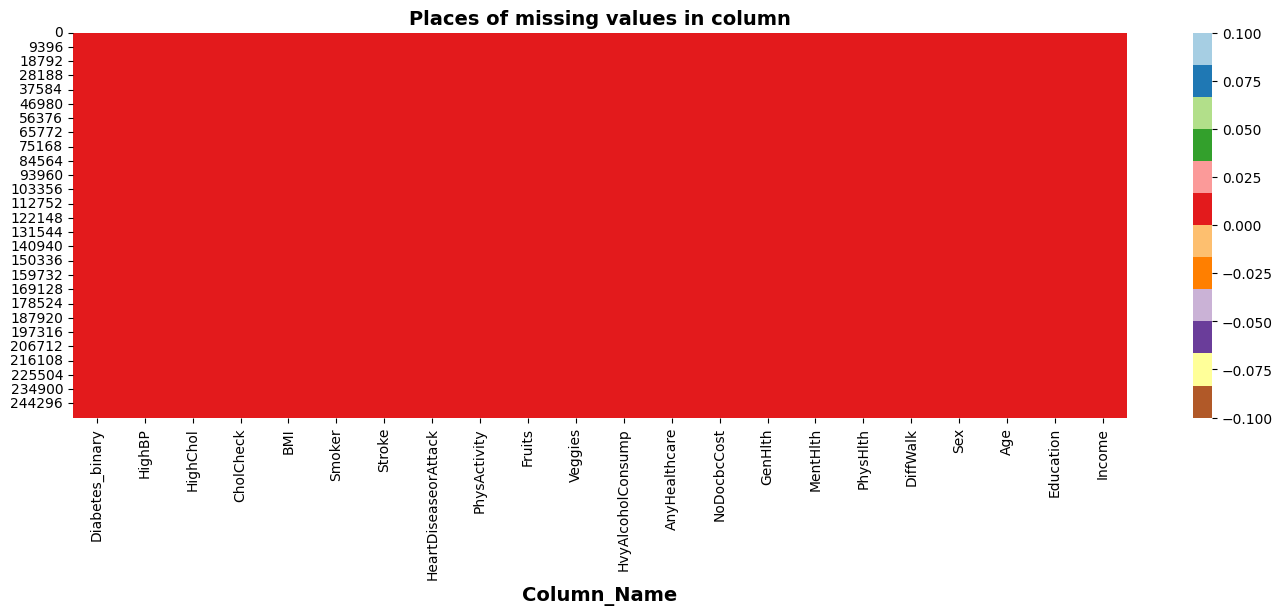

In [ ]:
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(), cbar=True, cmap='Paired_r')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

Transformation and Exploratory Data Analysis


```
# This is formatted as code
```






# 1: Data Transformations and EDA

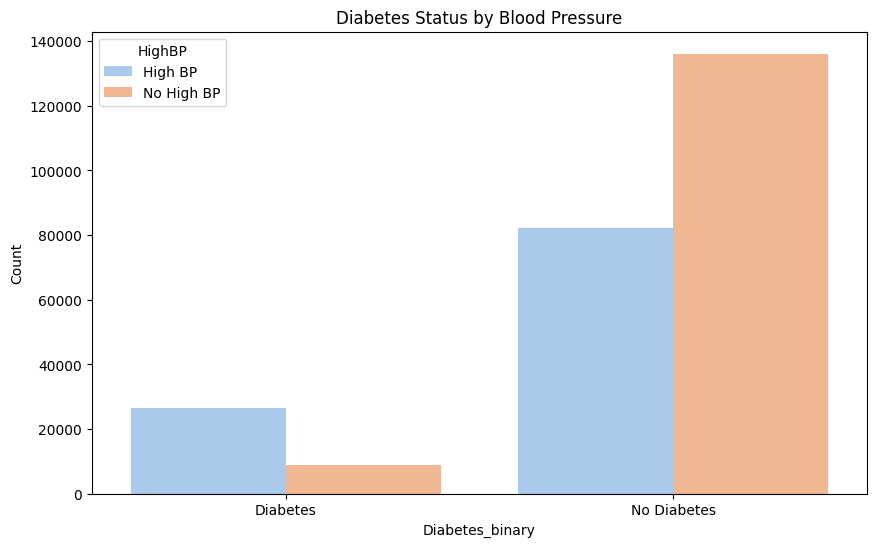

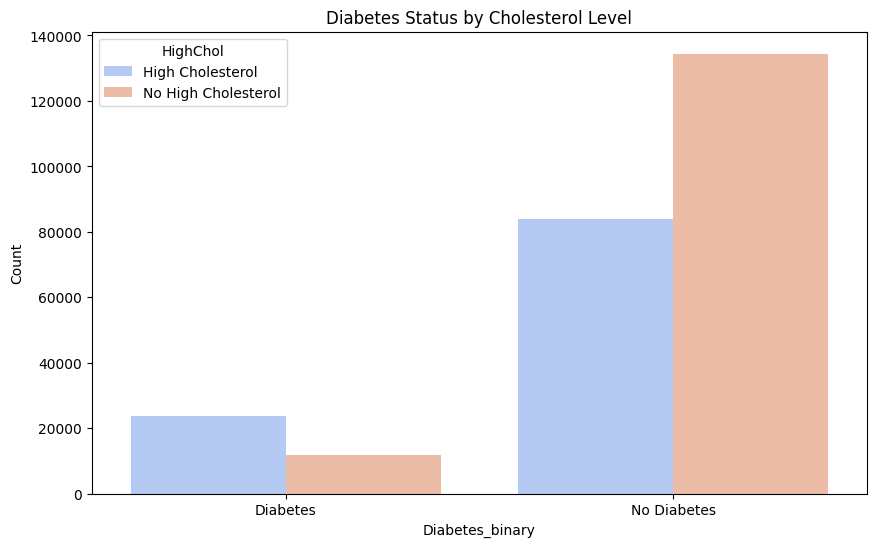

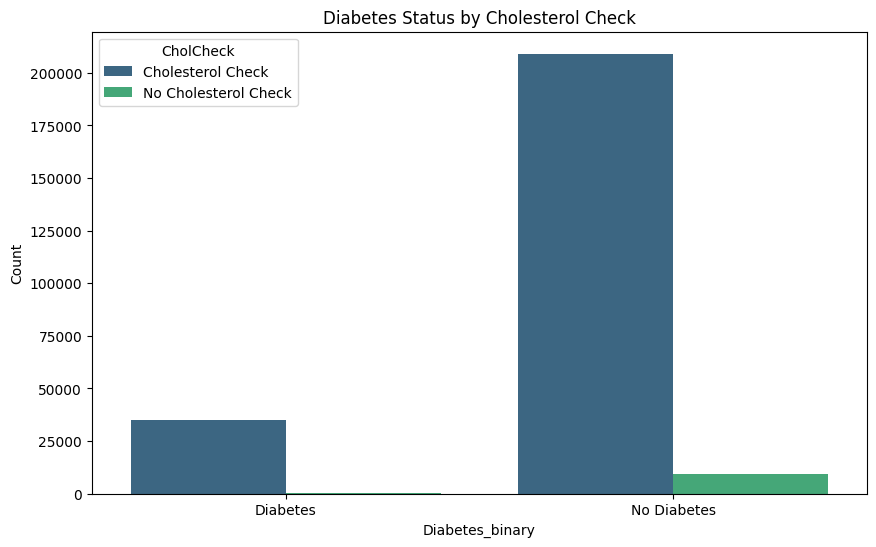

<ipython-input-169-25bc2fba0496>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Diabetes_binary', y='BMI', palette='Set1')


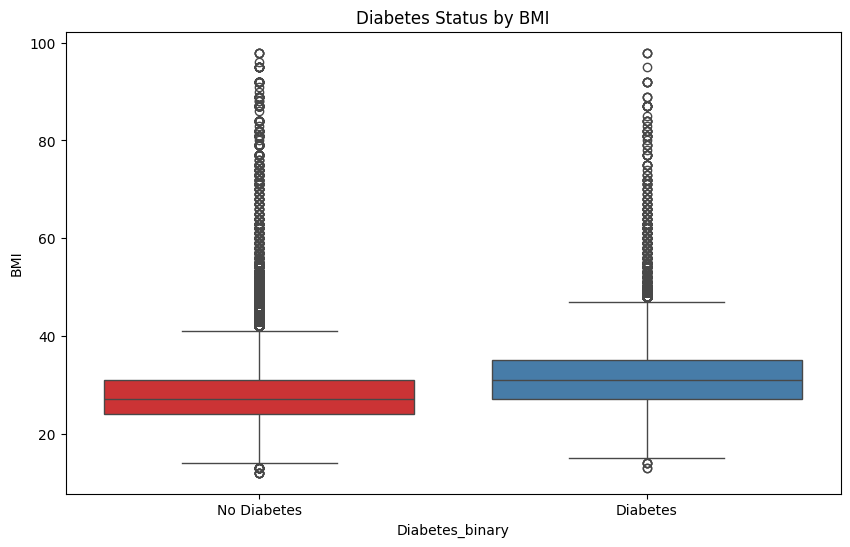

<ipython-input-169-25bc2fba0496>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GenHlth', data=df[df['Diabetes_binary'] == 'Diabetes'], order=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'], palette='Set3')


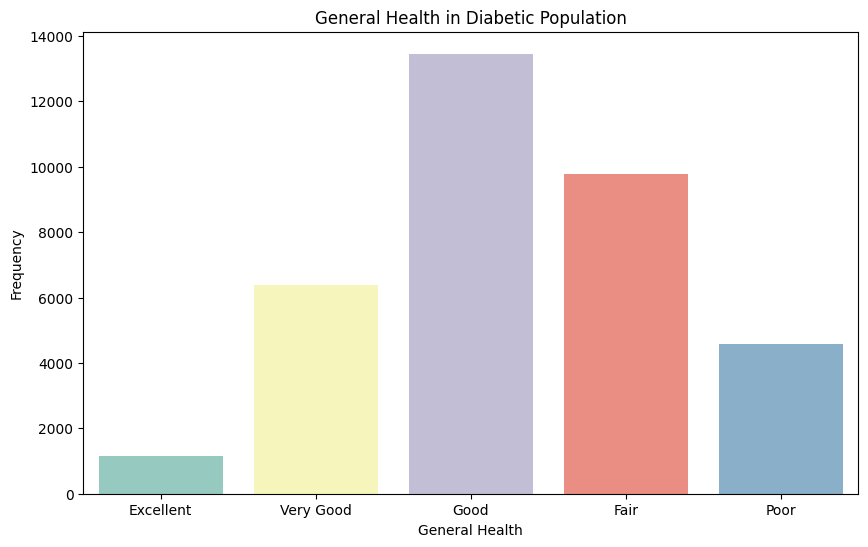

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data transformations using dictionary mappings for clarity and maintainability
status_mappings = {
    'Diabetes_binary': {0: 'No Diabetes', 1: 'Diabetes'},
    'HighBP': {0: 'No High BP', 1: 'High BP'},
    'HighChol': {0: 'No High Cholesterol', 1: 'High Cholesterol'},
    'CholCheck': {0: 'No Cholesterol Check', 1: 'Cholesterol Check'},
    'Smoker': {0: 'Non-Smoker', 1: 'Smoker'},
    'Stroke': {0: 'No Stroke', 1: 'Stroke'},
    'HeartDiseaseorAttack': {0: 'No Heart Disease/Attack', 1: 'Heart Disease/Attack'},
    'PhysActivity': {0: 'Inactive', 1: 'Active'},
    'Fruits': {0: 'No Fruits', 1: 'Consumes Fruits'},
    'Veggies': {0: 'No Veggies', 1: 'Consumes Veggies'},
    'HvyAlcoholConsump': {0: 'Low Alcohol Consumption', 1: 'High Alcohol Consumption'},
    'AnyHealthcare': {0: 'No Healthcare', 1: 'Has Healthcare'},
    'NoDocbcCost': {0: 'Not Delayed Due to Cost', 1: 'Delayed Due to Cost'},
    'GenHlth': {1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'},
    'DiffWalk': {0: 'No Difficulty Walking', 1: 'Difficulty Walking'},
    'Sex': {0: 'Female', 1: 'Male'},
    'Education': {1: 'Never Attended School', 2: 'Elementary', 3: 'Junior High', 4: 'Senior High', 5: 'Undergraduate', 6: 'Graduate'},
    'Income': {1: '<poor', 2: '<poor', 3: '<poor', 4: '<poor', 5: '<middle_class', 6: '<middle_class', 7: '<middle_class', 8: '>rich'}
}

# Applying mappings to transform data
for column, mapping in status_mappings.items():
    df[column] = df[column].map(mapping)

# Grouping and visualizing different aspects
def plot_grouped_data(df, group_by_cols, title, palette='pastel'):
    grouped_data = df.groupby(group_by_cols).size().reset_index(name='Count')
    plt.figure(figsize=(10, 6))
    sns.barplot(x=group_by_cols[0], y='Count', hue=group_by_cols[1], data=grouped_data, palette=palette)
    plt.title(title)
    plt.ylabel('Count')
    plt.show()

# Visualizing various groupings
plot_grouped_data(df, ['Diabetes_binary', 'HighBP'], "Diabetes Status by Blood Pressure")
plot_grouped_data(df, ['Diabetes_binary', 'HighChol'], "Diabetes Status by Cholesterol Level", palette='coolwarm')
plot_grouped_data(df, ['Diabetes_binary', 'CholCheck'], "Diabetes Status by Cholesterol Check", palette='viridis')

# More complex visualization - BMI by Diabetes status using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Diabetes_binary', y='BMI', palette='Set1')
plt.title("Diabetes Status by BMI")
plt.show()

# General Health Status in the diabetic population
plt.figure(figsize=(10, 6))
sns.countplot(x='GenHlth', data=df[df['Diabetes_binary'] == 'Diabetes'], order=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'], palette='Set3')
plt.title("General Health in Diabetic Population")
plt.xlabel("General Health")
plt.ylabel("Frequency")
plt.show()


**Exploratory Data Analysis**

# EDA 2

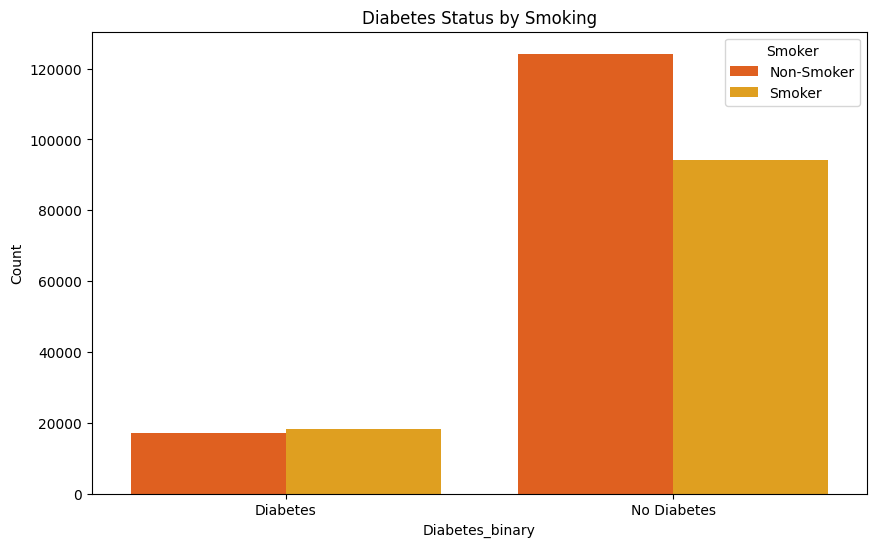

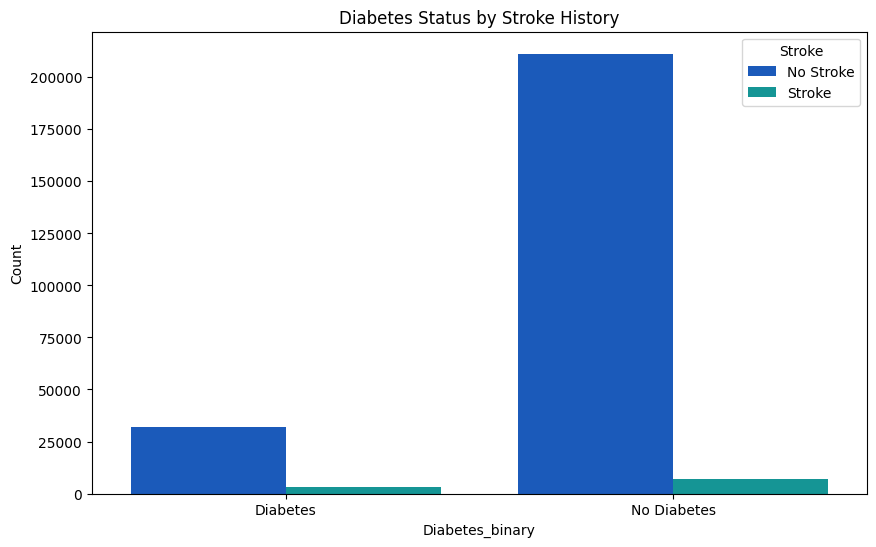

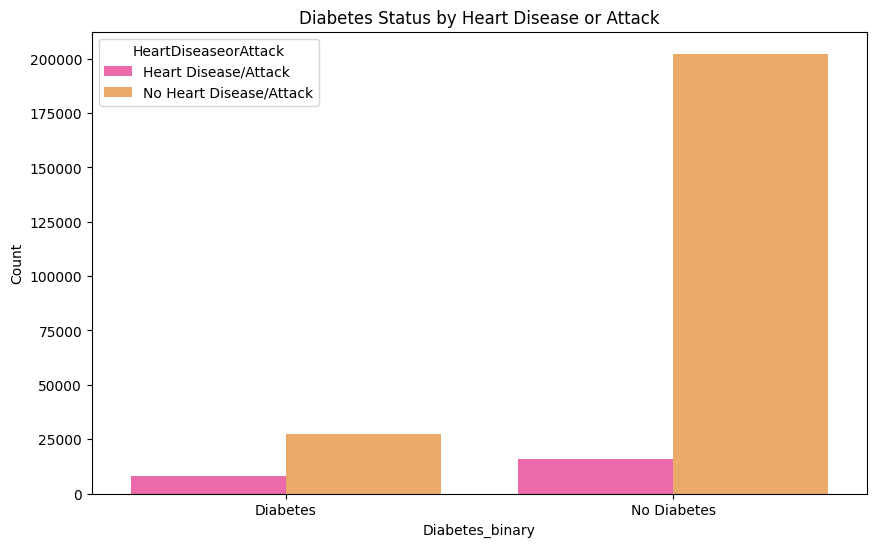

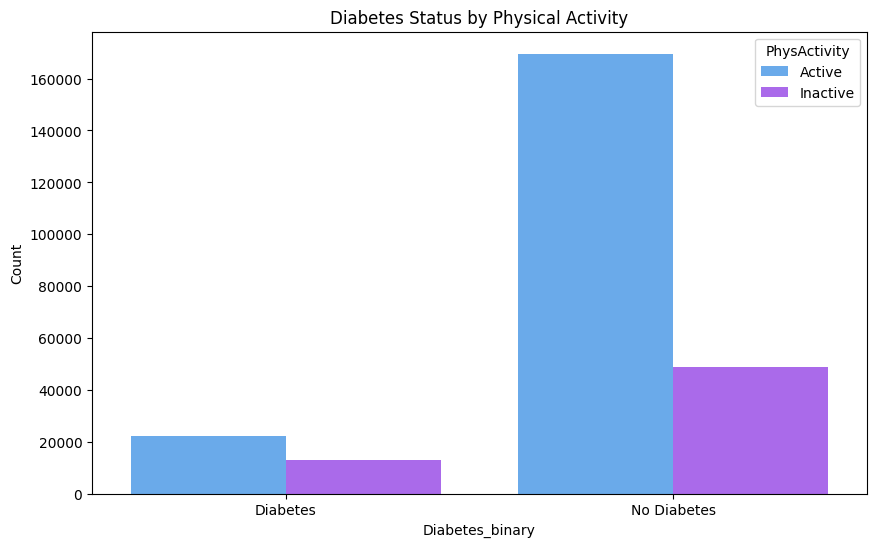

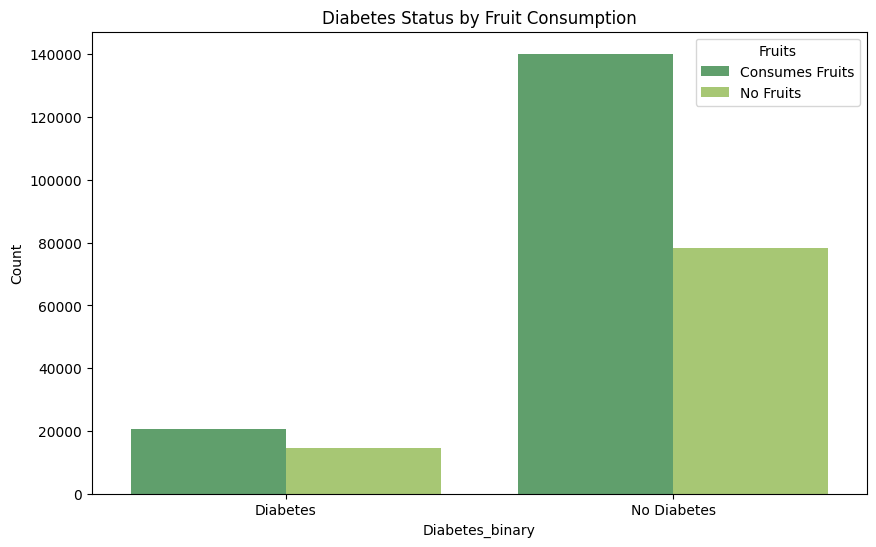

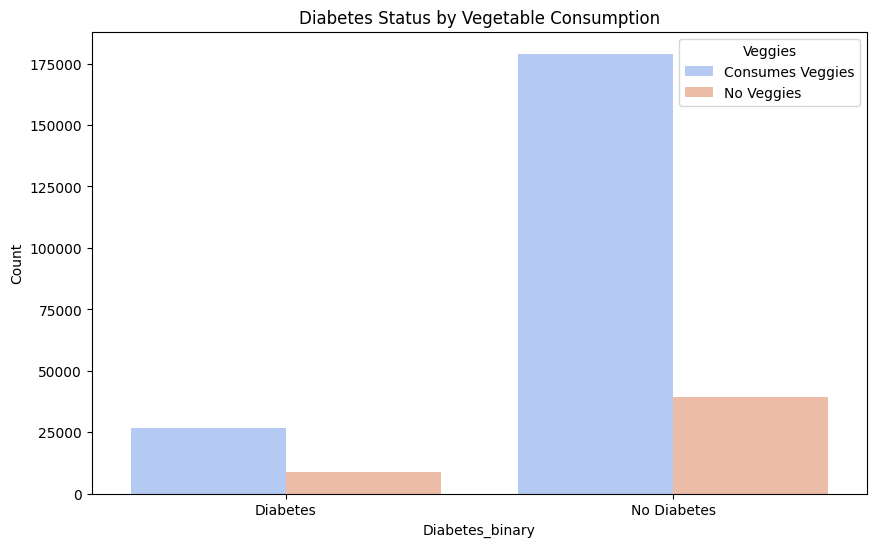

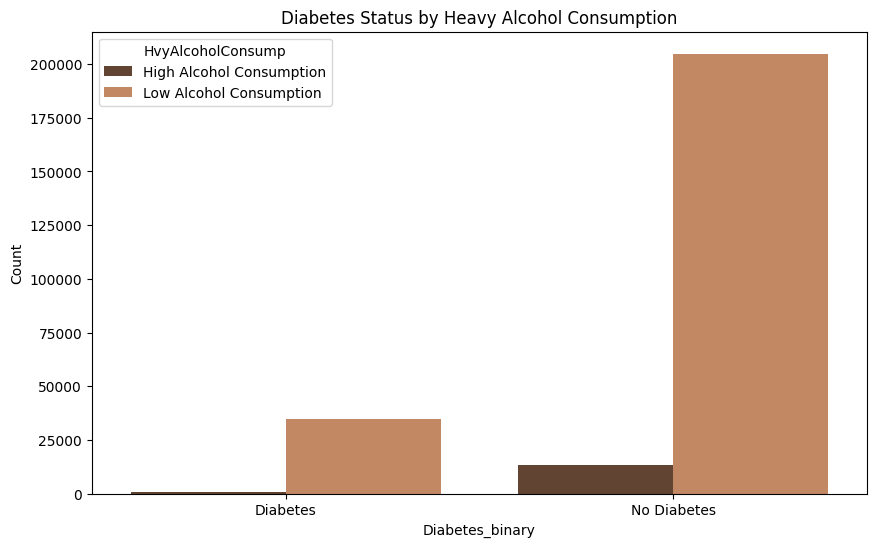

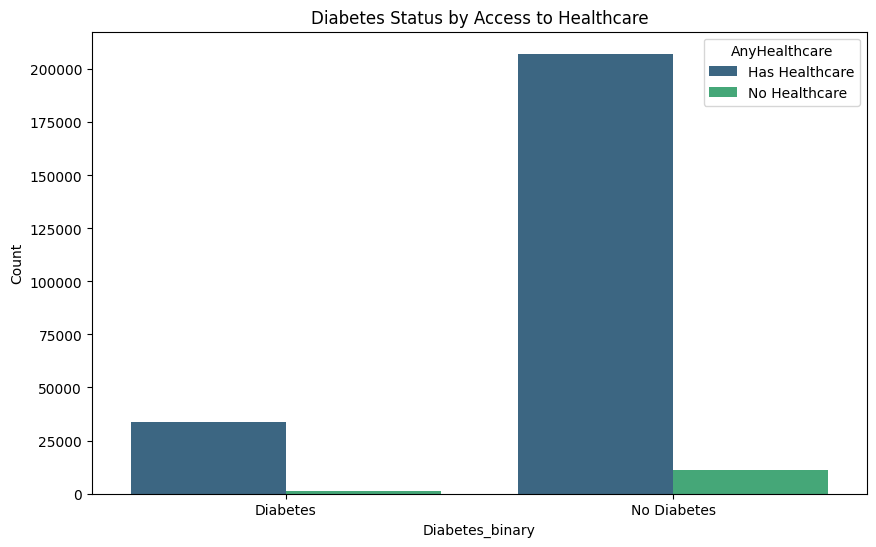

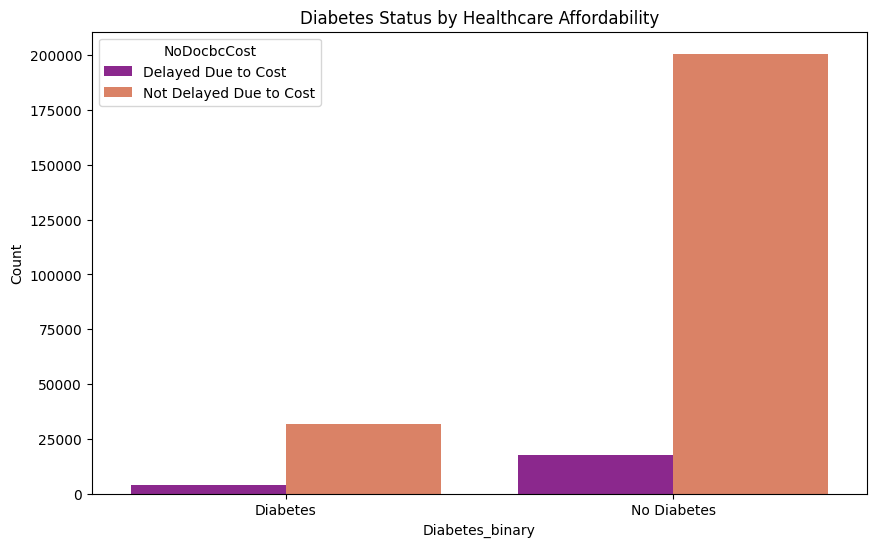

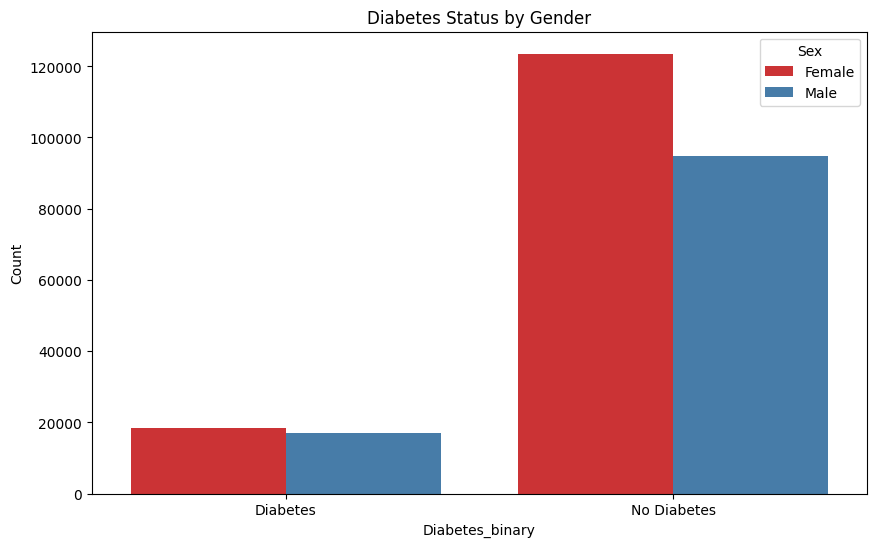

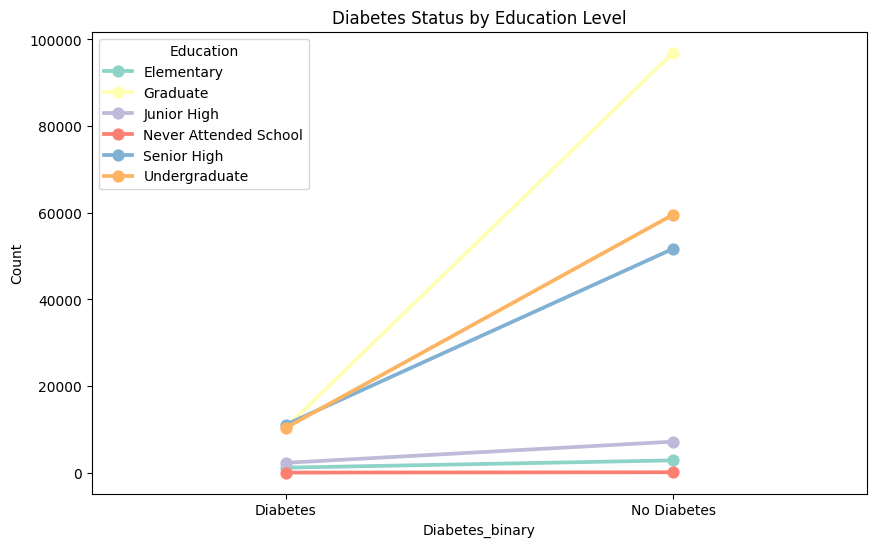

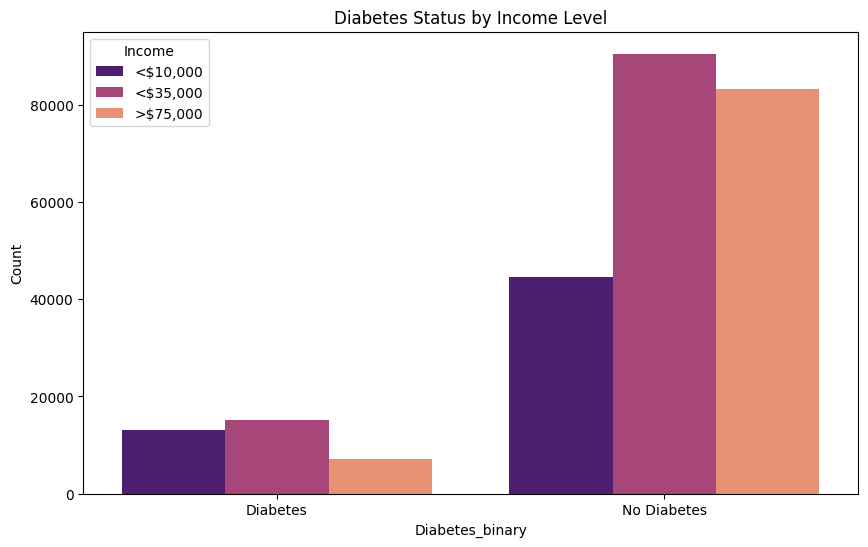

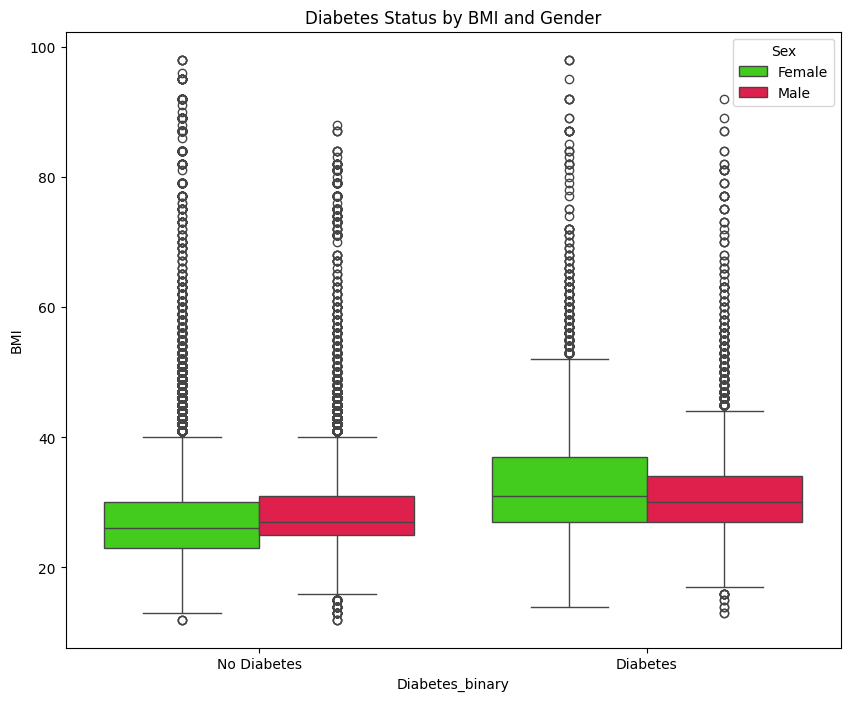

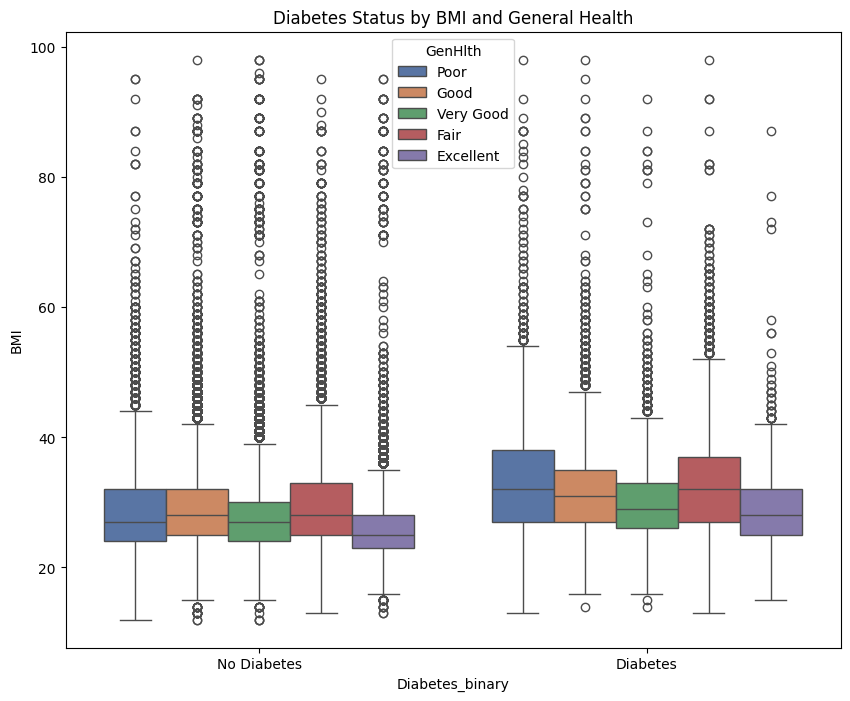

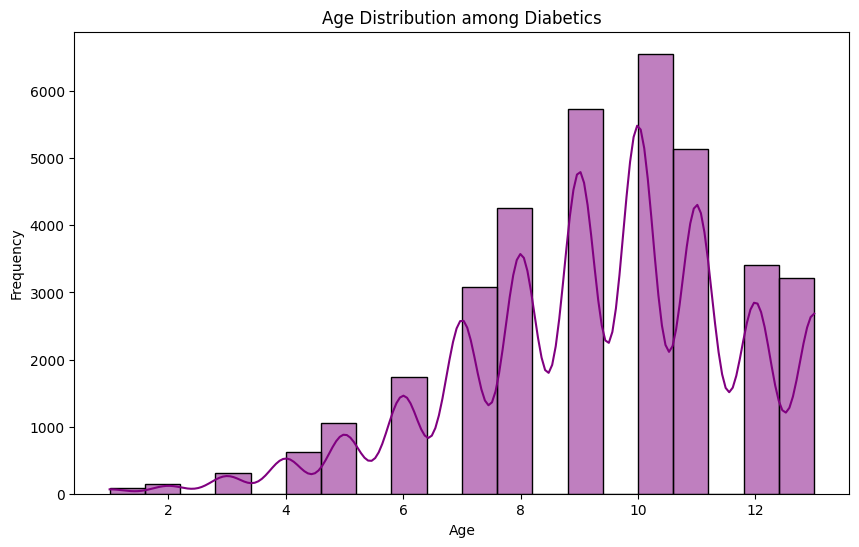

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring plots are shown inline
%matplotlib inline

# Function to plot grouped data
def plot_grouped_data(df, group_by_cols, title, palette='Set2', kind='bar'):
    grouped_data = df.groupby(group_by_cols).size().reset_index(name='Count')
    plt.figure(figsize=(10, 6))
    if kind == 'bar':
        sns.barplot(x=group_by_cols[0], y='Count', hue=group_by_cols[1], data=grouped_data, palette=palette)
    elif kind == 'point':
        sns.pointplot(x=group_by_cols[0], y='Count', hue=group_by_cols[1], data=grouped_data, palette=palette)
    plt.title(title)
    plt.ylabel('Count')
    plt.show()

# Visualizations for various health and lifestyle factors
plot_grouped_data(df, ['Diabetes_binary', 'Smoker'], "Diabetes Status by Smoking", 'autumn')
plot_grouped_data(df, ['Diabetes_binary', 'Stroke'], "Diabetes Status by Stroke History", 'winter')
plot_grouped_data(df, ['Diabetes_binary', 'HeartDiseaseorAttack'], "Diabetes Status by Heart Disease or Attack", 'spring')
plot_grouped_data(df, ['Diabetes_binary', 'PhysActivity'], "Diabetes Status by Physical Activity", 'cool')
plot_grouped_data(df, ['Diabetes_binary', 'Fruits'], "Diabetes Status by Fruit Consumption", 'summer')
plot_grouped_data(df, ['Diabetes_binary', 'Veggies'], "Diabetes Status by Vegetable Consumption", 'coolwarm')
plot_grouped_data(df, ['Diabetes_binary', 'HvyAlcoholConsump'], "Diabetes Status by Heavy Alcohol Consumption", 'copper')
plot_grouped_data(df, ['Diabetes_binary', 'AnyHealthcare'], "Diabetes Status by Access to Healthcare", 'viridis')
plot_grouped_data(df, ['Diabetes_binary', 'NoDocbcCost'], "Diabetes Status by Healthcare Affordability", 'plasma')
plot_grouped_data(df, ['Diabetes_binary', 'Sex'], "Diabetes Status by Gender", 'Set1')
plot_grouped_data(df, ['Diabetes_binary', 'Education'], "Diabetes Status by Education Level", 'Set3', kind='point')
plot_grouped_data(df, ['Diabetes_binary', 'Income'], "Diabetes Status by Income Level", 'magma')

# Advanced Visualizations for Health Status and BMI
plt.figure(figsize=(10, 8))
sns.boxplot(x='Diabetes_binary', y='BMI', hue='Sex', data=df, palette='prism')
plt.title("Diabetes Status by BMI and Gender")
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x='Diabetes_binary', y='BMI', hue='GenHlth', data=df, palette='deep')
plt.title("Diabetes Status by BMI and General Health")
plt.show()

# Age distribution in Diabetes
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Diabetes_binary'] == 'Diabetes']['Age'], bins=20, color='purple', kde=True)
plt.title("Age Distribution among Diabetics")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


<ipython-input-45-49d31a30adee>:11: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(x=group_by_cols[0], y='Count', hue=group_by_cols[1], data=grouped_data, palette=colors)


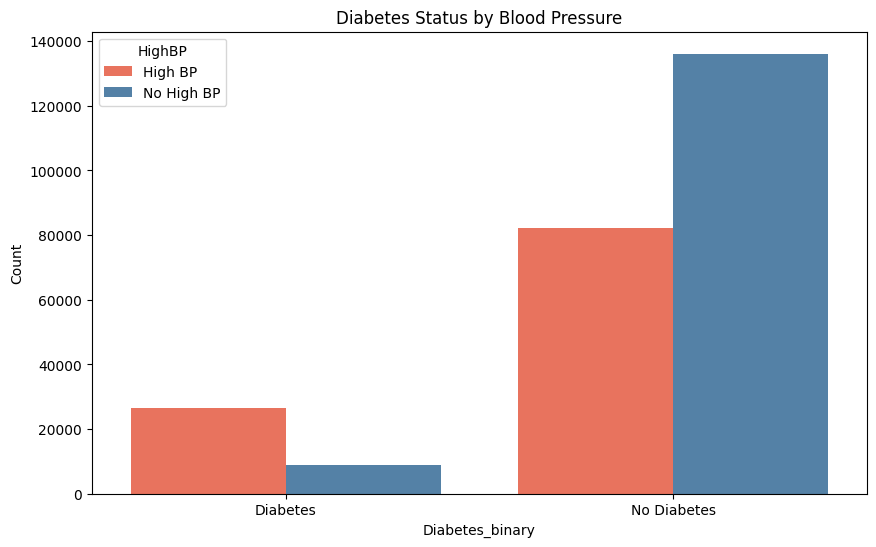

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom function to plot grouped data with customizable bar colors
def plot_grouped_data(df, group_by_cols, title, colors):
    grouped_data = df.groupby(group_by_cols).size().reset_index(name='Count')
    plt.figure(figsize=(10, 6))
    sns.barplot(x=group_by_cols[0], y='Count', hue=group_by_cols[1], data=grouped_data, palette=colors)
    plt.title(title)
    plt.ylabel('Count')
    plt.show()

# Custom colors for each group
custom_colors = ["#FF6347", "#4682B4", "#32CD32", "#FFD700"]  # Tomato, SteelBlue, LimeGreen, Gold

# Example usage of custom colors in bar plot
plot_grouped_data(df, ['Diabetes_binary', 'HighBP'], "Diabetes Status by Blood Pressure", custom_colors)


<ipython-input-55-52f0374ff713>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diabetes_binary', y='BMI', data=df, palette='muted')


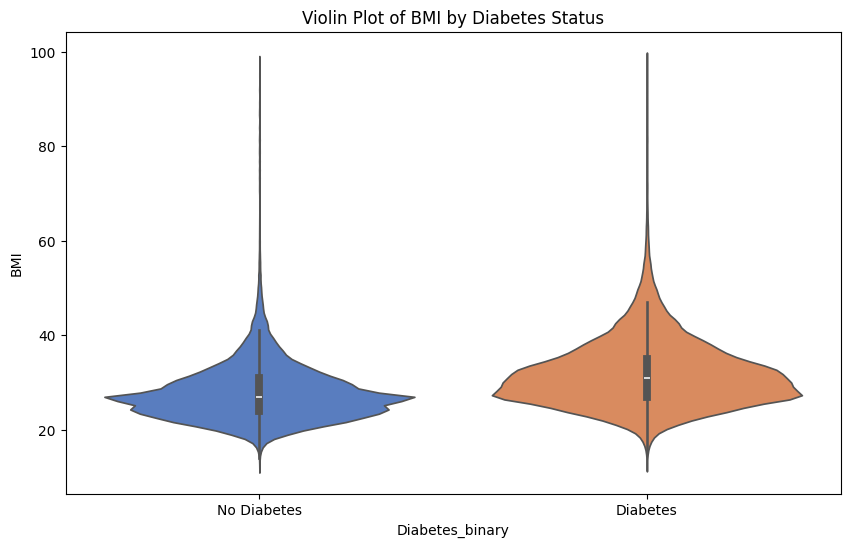

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Diabetes_binary', y='BMI', data=df, palette='muted')
plt.title("Violin Plot of BMI by Diabetes Status")
plt.show()


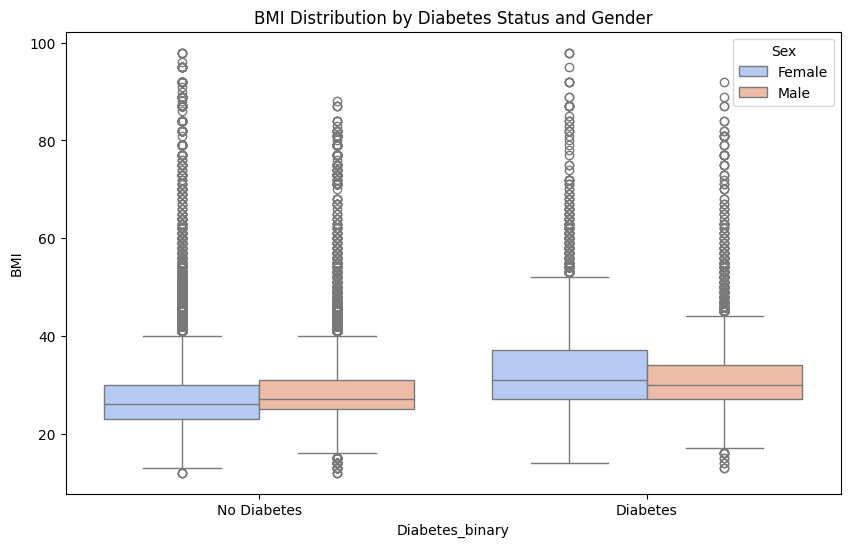

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_binary', y='BMI', hue='Sex', data=df, palette='coolwarm')
plt.title("BMI Distribution by Diabetes Status and Gender")
plt.show()


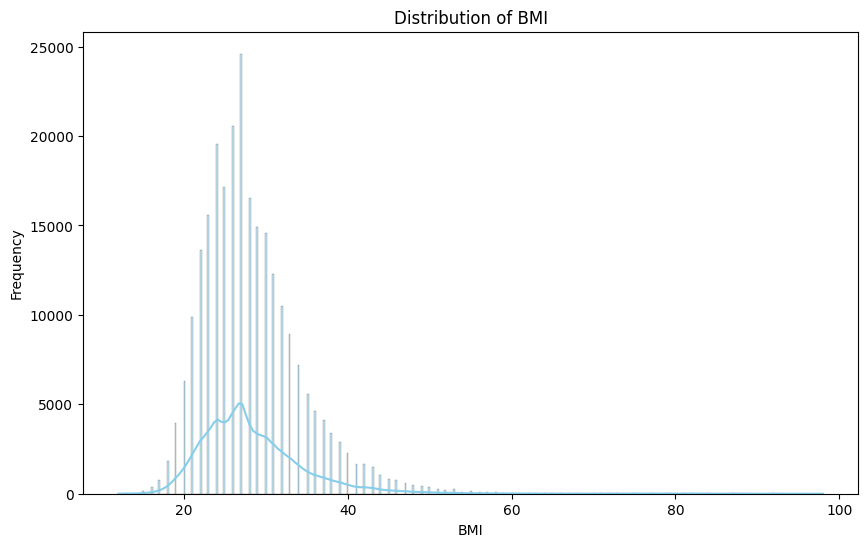

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], kde=True, color='skyblue')
plt.title("Distribution of BMI")
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


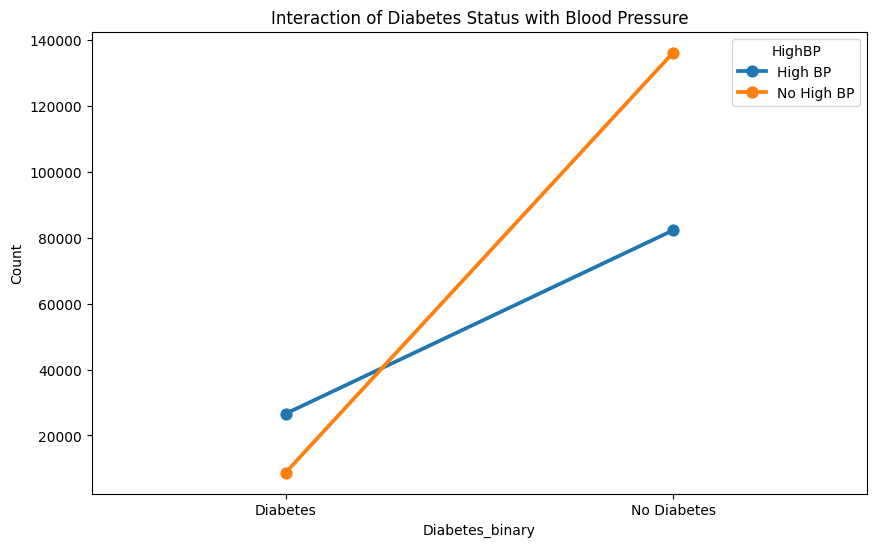

In [ ]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='Diabetes_binary', y='Count', hue='HighBP', data=df.groupby(['Diabetes_binary', 'HighBP']).size().reset_index(name='Count'))
plt.title("Interaction of Diabetes Status with Blood Pressure")
plt.ylabel('Count')
plt.show()


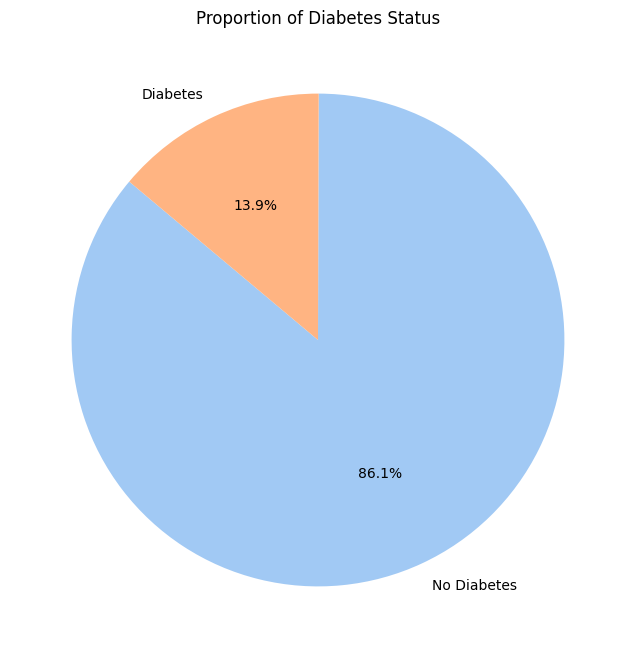

In [ ]:
def plot_pie_chart(df, column, title):
    plt.figure(figsize=(8, 8))
    data = df[column].value_counts()
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title(title)
    plt.show()

plot_pie_chart(df, 'Diabetes_binary', "Proportion of Diabetes Status")


In [ ]:
#transforming data
df['Diabetes_binary'] = df['Diabetes_binary'].astype('int')
df['HighBP'] = df['HighBP'].astype('int')
df['HighChol'] = df['HighChol'].astype('int')
df['CholCheck'] = df['CholCheck'].astype('int')
df['BMI'] = df['BMI'].astype('int')
df['Smoker'] = df['Smoker'].astype('int')
df['Stroke'] = df['Stroke'].astype('int')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype('int')
df['PhysActivity'] = df['PhysActivity'].astype('int')
df['Fruits'] = df['Fruits'].astype('int')
df['Veggies'] = df['Veggies'].astype('int')

df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].astype('int')
df['AnyHealthcare'] = df['AnyHealthcare'].astype('int')
df['NoDocbcCost'] = df['NoDocbcCost'].astype('int')
df['GenHlth'] = df['GenHlth'].astype('int')
df['MentHlth'] = df['MentHlth'].astype('int')
df['PhysHlth'] = df['PhysHlth'].astype('int')
df['DiffWalk'] = df['DiffWalk'].astype('int')
df['Sex'] = df['Sex'].astype('int')
df['Age'] = df['Age'].astype('int')
df['Education'] = df['Education'].astype('int')
df['Income'] = df['Income'].astype('int')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


# 2:**Correlation Matrix**

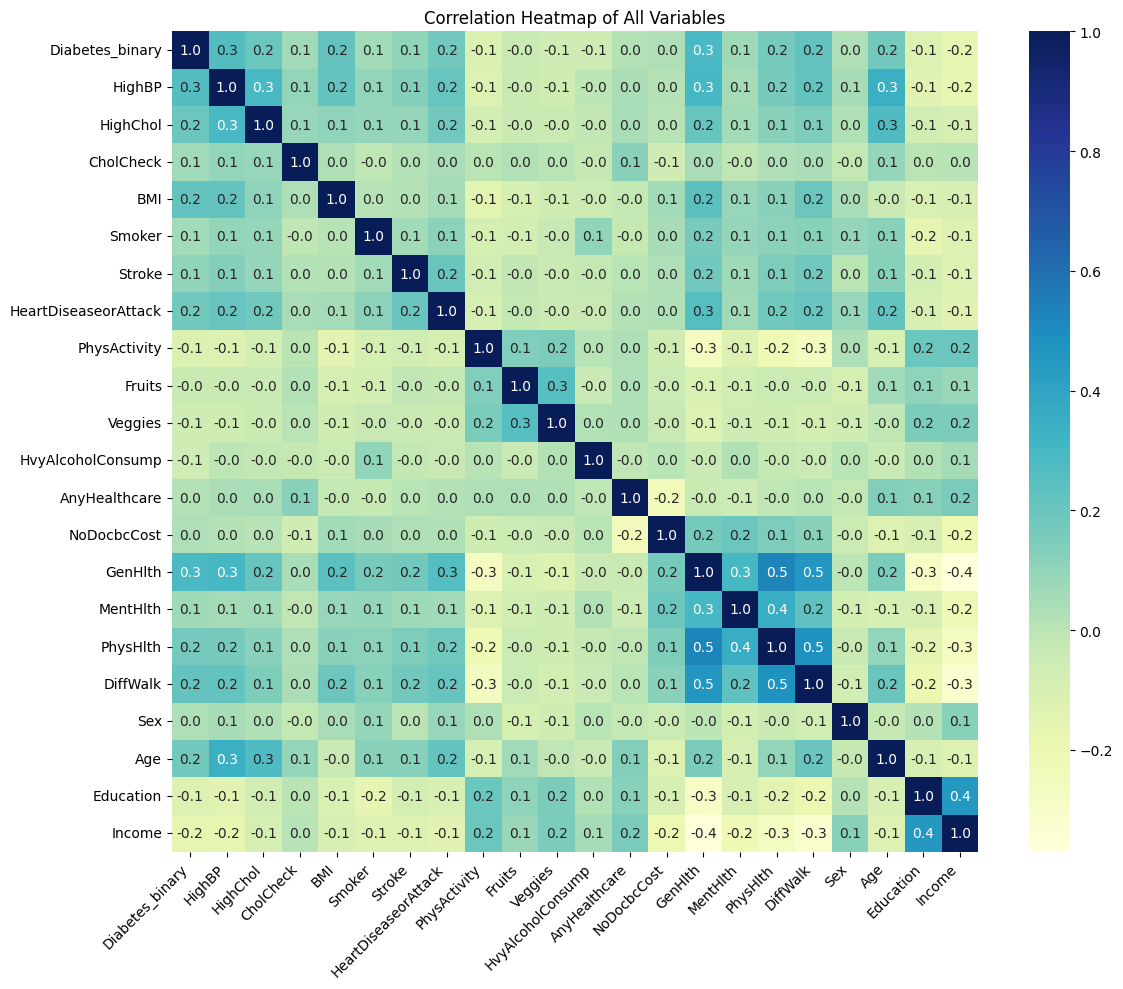

In [ ]:
# Visualization 4: Correlation Heatmap of All Variables
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt='.1f')
plt.title('Correlation Heatmap of All Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 3: Machine Learning with Python

In [ ]:
# Splitting the dataset into features and target variable
features = df.drop(columns='Diabetes_binary')
target = df['Diabetes_binary']

# Splitting data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=0
)

# Building the RandomForest model
random_forest_classifier = RandomForestClassifier(
    random_state=1, max_features='sqrt', n_jobs=-1, verbose=1
)

# Training the model and measuring the time
start_time = time()
random_forest_classifier.fit(features_train, target_train)
elapsed_time = time() - start_time
print(f"Training Time: {elapsed_time:.2f} seconds")

# Evaluating the model
accuracy = random_forest_classifier.score(features_test, target_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Making predictions on the test set
predicted_labels = random_forest_classifier.predict(features_test)

# Calculating Mean Squared Error and Root Mean Squared Error
mse_value = mean_squared_error(target_test, predicted_labels)
rmse_value = np.sqrt(mse_value)
print(f"Mean Squared Error: {mse_value:.2f}")
print(f"Root Mean Squared Error: {rmse_value:.2f}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


Training Time: 20.68 seconds


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


Test Accuracy: 0.86


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s


Mean Squared Error: 0.14
Root Mean Squared Error: 0.38


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.7s finished


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(target_test, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(target_test, predicted_labels, average='binary')
recall = recall_score(target_test, predicted_labels, average='binary')
f1 = f1_score(target_test, predicted_labels, average='binary')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.86
Precision: 0.50
Recall: 0.17
F1 Score: 0.25


Mean Squared Error: 0.14
Root Mean Squared Error: 0.38


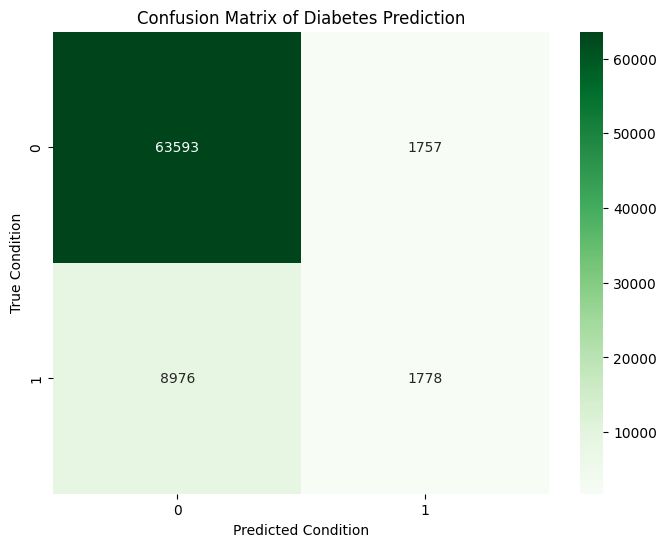

In [ ]:
from sklearn.metrics import mean_squared_error, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating Mean Squared Error and Root Mean Squared Error
mse_value = mean_squared_error(target_test, predicted_labels)
rmse_value = np.sqrt(mse_value)
print(f"Mean Squared Error: {mse_value:.2f}")
print(f"Root Mean Squared Error: {rmse_value:.2f}")

# Generateing the confusion matrix
conf_matrix = confusion_matrix(target_test, predicted_labels)

# Visualizing the confusion matrix using seaborn for better aesthetics
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Greens')
plt.title("Confusion Matrix of Diabetes Prediction")
plt.xlabel("Predicted Condition")
plt.ylabel("True Condition")
plt.show()


              precision    recall  f1-score   support

           0       0.88      0.97      0.92     65350
           1       0.50      0.17      0.25     10754

    accuracy                           0.86     76104
   macro avg       0.69      0.57      0.59     76104
weighted avg       0.82      0.86      0.83     76104



[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.0s finished


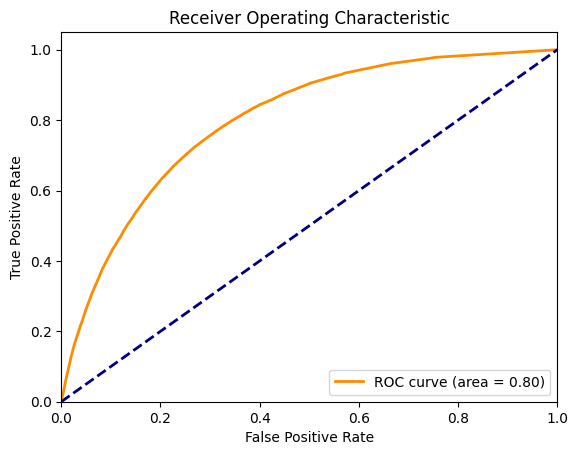

In [ ]:
from sklearn.metrics import classification_report
class_report = classification_report(target_test, predicted_labels)
print(class_report)

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(target_test, random_forest_classifier.predict_proba(features_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Defining features and calculate their importance
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_importances)

# Visualizing feature importances with different colors for each bar using matplotlib
plt.figure(figsize=(10, 6))
# Generating a color map with a unique color for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importances)))

# Creating a bar plot
plt.bar(feature_importances.index, feature_importances.values, color=colors)
plt.title("Feature Importance")
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.show()


NameError: name 'rf' is not defined

In [ ]:
import pandas as pd

# Mapping dictionaries for transformation
binary_map = {0: 'No', 1: 'Yes'}
health_status_map = {1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'}
education_map = {1: 'Never Attended School', 2: 'Elementary', 3: 'Junior High School',
                 4: 'Senior High School', 5: 'Undergraduate Degree', 6: 'Magister'}
income_map = {1: 'Poor', 2: 'Poor', 3: 'Poor',
              4: 'Poor', 5: 'Middle_Class', 6: 'Middle_Class',
              7: 'MIddle_Class', 8: 'Rich'}
gender_map = {0: 'Female', 1: 'Male'}
cholesterol_check_map = {0: 'No Cholesterol Check Recently', 1: 'Cholesterol Check Recently'}

# Applying transformations using map
df['Diabetes_binary'] = df['Diabetes_binary'].map(binary_map)
df['HighBP'] = df['HighBP'].map(binary_map)
df['HighChol'] = df['HighChol'].map(binary_map)
df['CholCheck'] = df['CholCheck'].map(cholesterol_check_map)
df['Smoker'] = df['Smoker'].map(binary_map)
df['Stroke'] = df['Stroke'].map(binary_map)
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].map(binary_map)
df['PhysActivity'] = df['PhysActivity'].map(binary_map)
df['Fruits'] = df['Fruits'].map(binary_map)
df['Veggies'] = df['Veggies'].map(binary_map)
df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].map(binary_map)
df['AnyHealthcare'] = df['AnyHealthcare'].map(binary_map)
df['NoDocbcCost'] = df['NoDocbcCost'].map(binary_map)
df['GenHlth'] = df['GenHlth'].map(health_status_map)
df['DiffWalk'] = df['DiffWalk'].map(binary_map)
df['Sex'] = df['Sex'].map(gender_map)
df['Education'] = df['Education'].map(education_map)
df['Income'] = df['Income'].map(income_map)

# Show the first few rows of the transformed dataframe
df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No,Yes,Yes,Cholesterol Check Recently,40,Yes,No,No,No,No,...,Yes,No,Poor,18,15,Yes,Female,9,Senior High School,Poor
1,No,No,No,No Cholesterol Check Recently,25,Yes,No,No,Yes,No,...,No,Yes,Good,0,0,No,Female,7,Magister,Poor
2,No,Yes,Yes,Cholesterol Check Recently,28,No,No,No,No,Yes,...,Yes,Yes,Poor,30,30,Yes,Female,9,Senior High School,Rich
3,No,Yes,No,Cholesterol Check Recently,27,No,No,No,Yes,Yes,...,Yes,No,Very Good,0,0,No,Female,11,Junior High School,Middle_Class
4,No,Yes,Yes,Cholesterol Check Recently,24,No,No,No,Yes,Yes,...,Yes,No,Very Good,3,0,No,Female,11,Undergraduate Degree,Poor


# K-Mean Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


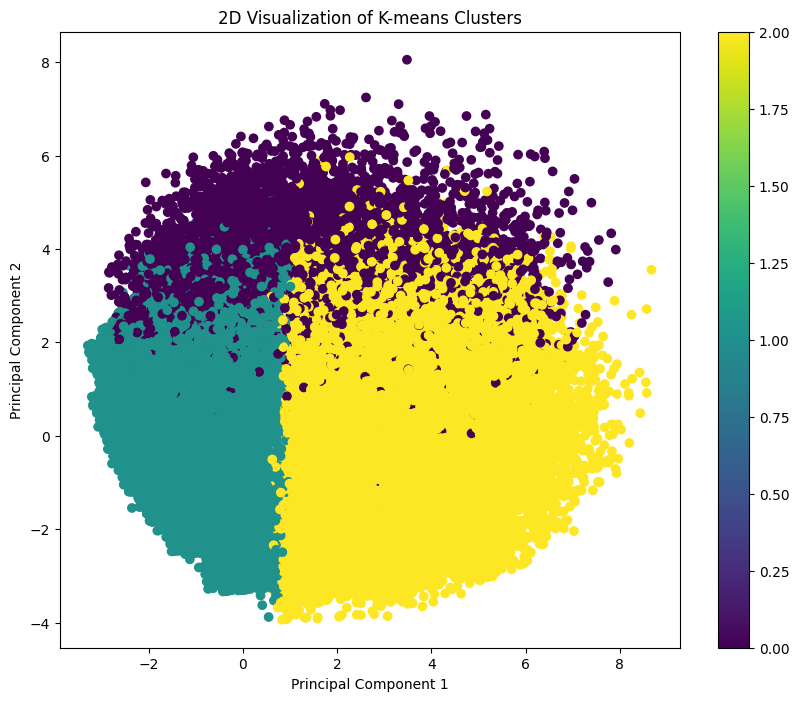

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

clustering_data = dataset.drop('Diabetes_binary', axis=1)

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(clustering_data)

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)  # Change to 3 for a 3D visualization
principal_components = pca.fit_transform(data_scaled)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# 2D Visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', label=clusters)
plt.title('2D Visualization of K-means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()

# **Clustering 3D Visualisation**

# 4: K-Mean Clustering 3D visualisation Python

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


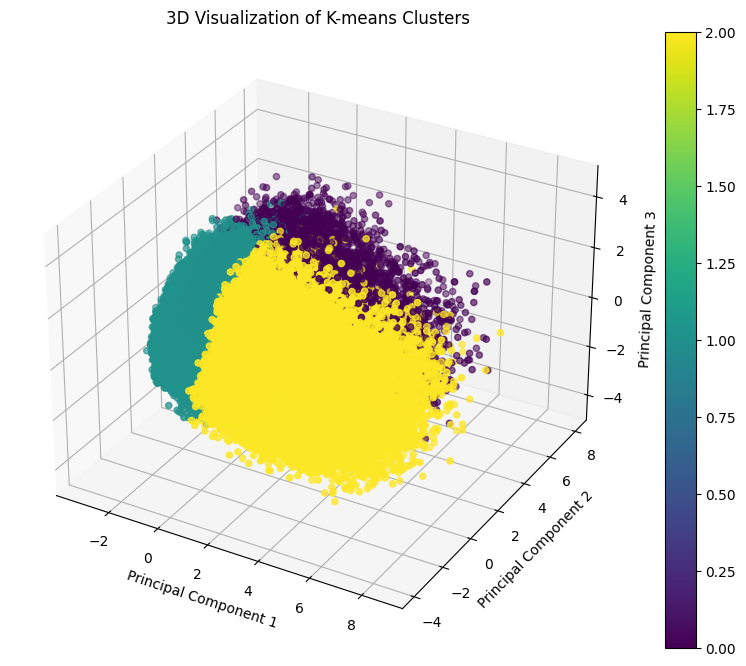

In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

dataset = pd.read_csv('/content/drive/MyDrive/Big Data Sugar/Diabetes_dataset.csv')
clustering_data = dataset.drop('Diabetes_binary', axis=1)

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(clustering_data)

# Dimensionality Reduction with PCA for 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(data_scaled)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# 3D Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2],
                     c=clusters, cmap='viridis', label=clusters)
plt.title('3D Visualization of K-means Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(scatter)
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2


# X is a DataFrame of feature values, and Y is a Series of target values.

# Applying SelectKBest class to extract top 10 best features using the chi2 score function
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X, Y)

# Creating a data frame to view the scores of the features
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# Concatenating two dataframes for better visualization
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature', 'Score']  # Naming the dataframe columns

# Display the dataframe sorted by the 'Score' in descending order
feature_scores.sort_values(by='Score', ascending=False, inplace=True)

print(feature_scores.nlargest(16,'Score'))


                 Feature          Score
11              PhysHlth  133424.406534
10              MentHlth   21029.632228
2                    BMI   18355.166400
12              DiffWalk   10059.506391
0                 HighBP   10029.013935
9                GenHlth    9938.507776
13                   Age    9276.141199
5   HeartDiseaseorAttack    7221.975378
1               HighChol    5859.710582
4                 Stroke    2725.225194
6           PhysActivity     861.887532
7      HvyAlcoholConsump     779.424807
14             Education     756.035496
3                 Smoker     521.978858
8            NoDocbcCost     229.542412


In [ ]:
print(df.columns)


Index(['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age',
       'Education'],
      dtype='object')


0    218334
1     35346
Name: Diabetes_binary, dtype: int64
0    35346
1    35346
Name: Diabetes_binary, dtype: int64
Training set score: 0.8585
Test set score: 0.8596
Mean Squared Error: 0.14039182403281703
Root Mean Squared Error: 0.37468896972397925
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      7090
           1       0.92      0.79      0.85      7049

    accuracy                           0.86     14139
   macro avg       0.87      0.86      0.86     14139
weighted avg       0.87      0.86      0.86     14139



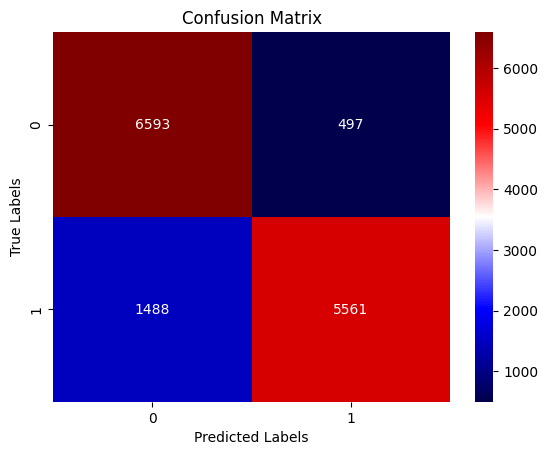

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from imblearn.under_sampling import NearMiss
import seaborn as sns

df.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')

columns_to_drop = ["Fruits", "Veggies", "Sex", "CholCheck", "AnyHealthcare", "Income"]
dataset.drop(columns_to_drop, axis=1, inplace=True)

X = df.drop("Diabetes_binary", axis=1)
Y = df["Diabetes_binary"]

print(Y.value_counts())

# Implementing NearMiss for handling class imbalance
nm = NearMiss(version=1, n_neighbors=10)
x_resampled, y_resampled = nm.fit_resample(X, Y)

print(y_resampled.value_counts())

# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1200)
log_reg.fit(X_train_scaled, Y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Model evaluation
print('Training set score: {:.4f}'.format(log_reg.score(X_train_scaled, Y_train)))
print('Test set score: {:.4f}'.format(log_reg.score(X_test_scaled, Y_test)))

# Calculating MSE & RMSE
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Classification report
print(classification_report(Y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='seismic', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# 5: Machine Learning Decision Tree

Training set score: 0.8807
Test set score: 0.8745
       True values  Predicted values
44967            1                 1
20220            0                 0
23944            0                 0
2707             0                 0
42356            1                 1
Mean Squared Error: 0.13
Root Mean Squared Error: 0.35
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      7090
           1       0.95      0.79      0.86      7049

    accuracy                           0.87     14139
   macro avg       0.89      0.87      0.87     14139
weighted avg       0.89      0.87      0.87     14139



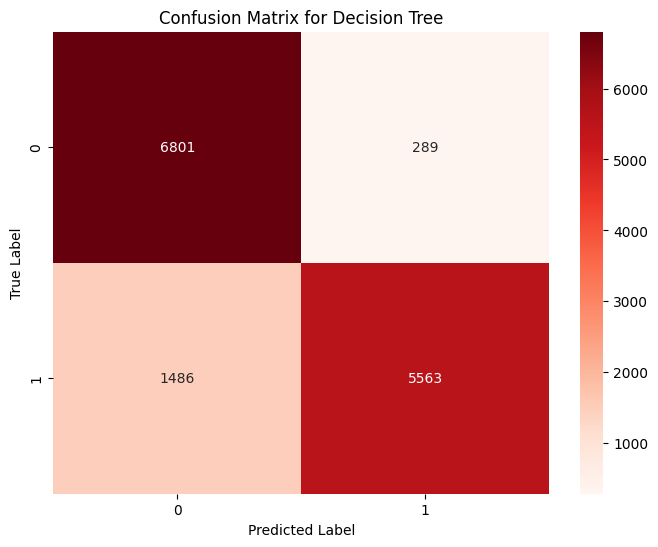

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=12)
dt.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Output the training and test set scores to evaluate the model
print(f'Training set score: {dt.score(X_train, Y_train):.4f}')
print(f'Test set score: {dt.score(X_test, Y_test):.4f}')

# Creating a DataFrame to compare true values and predicted values
pred_df = pd.DataFrame({
    'True values': Y_test,
    'Predicted values': y_pred
})
print(pred_df.head())  # Display the first few rows

# Calculate MSE & RMSE
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)  # Using numpy's sqrt function for consistency
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

# Print the classification report for more detailed model evaluation
print(classification_report(Y_test, y_pred))

# Calculating and plotting the confusion matrix
cm1 = confusion_matrix(Y_test, y_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=True)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)

plot_confusion_matrix(cm1, title='Confusion Matrix for Decision Tree')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f1 = f1_score(Y_test, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.89
Recall: 0.87
F1 Score: 0.87


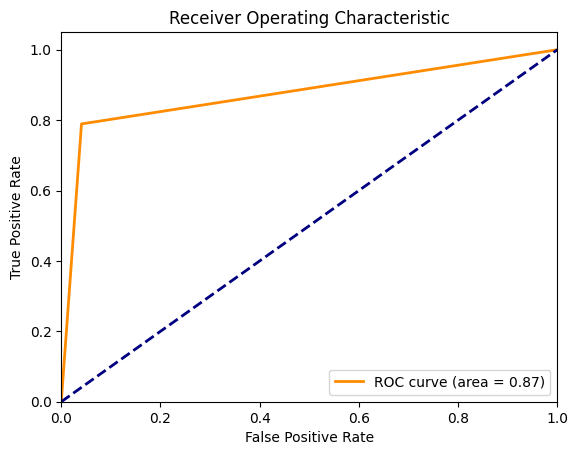

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(Y_test, classes=np.unique(Y_train))
y_pred_bin = label_binarize(y_pred, classes=np.unique(Y_train))

# Computing ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = roc_auc_score(y_test_bin, y_pred_bin)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Part 2, Classification using Apache Spark

In [ ]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=8f717a5ec01066bdfcba8bf76b1ac16df0fc0afbf44e4fef7f7116919eb2b7bc
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

# Initializing a Spark session
spark = SparkSession.builder \
    .appName("Diabetes Prediction with RandomForest") \
    .getOrCreate()


# Random FOrest with APache Spark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col
from pyspark.ml.evaluation import RegressionEvaluator
from time import time  # Ensure time is imported if not already

# Initializing a Spark session
spark = SparkSession.builder \
    .appName("Diabetes Prediction with RandomForest") \
    .getOrCreate()

# Converting Pandas DataFrame to Spark DataFrame
df2 = spark.createDataFrame(df)

# Splitting the dataset into features and target variable
feature_columns = [column for column in df.columns if column != 'Diabetes_binary']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(df2)
data = data.select(col("features"), col("Diabetes_binary").alias("label"))

# Splitting data into training and testing sets
train_data, test_data = data.randomSplit([0.7, 0.3], seed=0)

# Building the RandomForest model
random_forest_classifier = RandomForestClassifier(
    labelCol="label", featuresCol="features",
    maxBins=32, maxDepth=5, numTrees=20, seed=1
)

# Training the model
start_time = time()
model = random_forest_classifier.fit(train_data)
elapsed_time = time() - start_time
print(f"Training Time: {elapsed_time:.2f} seconds")

# Evaluating the model using BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
accuracy = evaluator.evaluate(model.transform(test_data))
print(f"Test Accuracy: {accuracy:.2f}")

# Making predictions on the test set
predictions = model.transform(test_data)

# Calculating Mean Squared Error and Root Mean Squared Error
mse_evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="mse"
)
mse_value = mse_evaluator.evaluate(predictions)
rmse_value = mse_value ** 0.5
print(f"Mean Squared Error: {mse_value:.2f}")
print(f"Root Mean Squared Error: {rmse_value:.2f}")

# Stop the Spark session
#spark.stop()


Training Time: 27.13 seconds
Test Accuracy: 0.80
Mean Squared Error: 0.14
Root Mean Squared Error: 0.37


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Diabetes Prediction with RandomForest") \
    .getOrCreate()

# Initialize evaluators for different metrics
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
evaluator_precision = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedRecall")
evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1")

# Evaluate metrics
accuracy = evaluator_accuracy.evaluate(predictions)
precision = evaluator_precision.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)
f1 = evaluator_f1.evaluate(predictions)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Stop the Spark session
#spark.stop()


Accuracy: 0.86
Precision: 0.74
Recall: 0.86
F1 Score: 0.80


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.evaluation import RegressionEvaluator
import pyspark.sql.functions as F
from pyspark.sql.types import IntegerType

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Diabetes Prediction Analysis") \
    .getOrCreate()

# Calculating Mean Squared Error and Root Mean Squared Error
mse_evaluator = RegressionEvaluator(
    labelCol="label",
    predictionCol="prediction",
    metricName="mse"
)
mse_value = mse_evaluator.evaluate(predictions)
rmse_value = mse_value ** 0.5
print(f"Mean Squared Error: {mse_value:.2f}")
print(f"Root Mean Squared Error: {rmse_value:.2f}")

# Generating the confusion matrix
confusion_matrix = predictions.select('prediction', 'label') \
    .withColumn('prediction', col('prediction').cast(IntegerType())) \
    .withColumn('label', col('label').cast(IntegerType())) \
    .groupBy('label') \
    .pivot('prediction', [0, 1]) \
    .count() \
    .na.fill(0)  # Fill missing counts with zero

# Show the confusion matrix
confusion_matrix.show()


if False:
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Collect the data to a Pandas DataFrame for visualization
    pd_conf_matrix = confusion_matrix.toPandas()
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd_conf_matrix, annot=True, fmt="d", cmap='Greens')
    plt.title("Confusion Matrix of Diabetes Prediction")
    plt.xlabel("Predicted Condition")
    plt.ylabel("True Condition")
    plt.show()

# Stop the Spark session
#spark.stop()


Mean Squared Error: 0.14
Root Mean Squared Error: 0.37
+-----+-----+---+
|label|    0|  1|
+-----+-----+---+
|    1|10569|  0|
|    0|65832|  0|
+-----+-----+---+



# Feature Importance Apache Spark

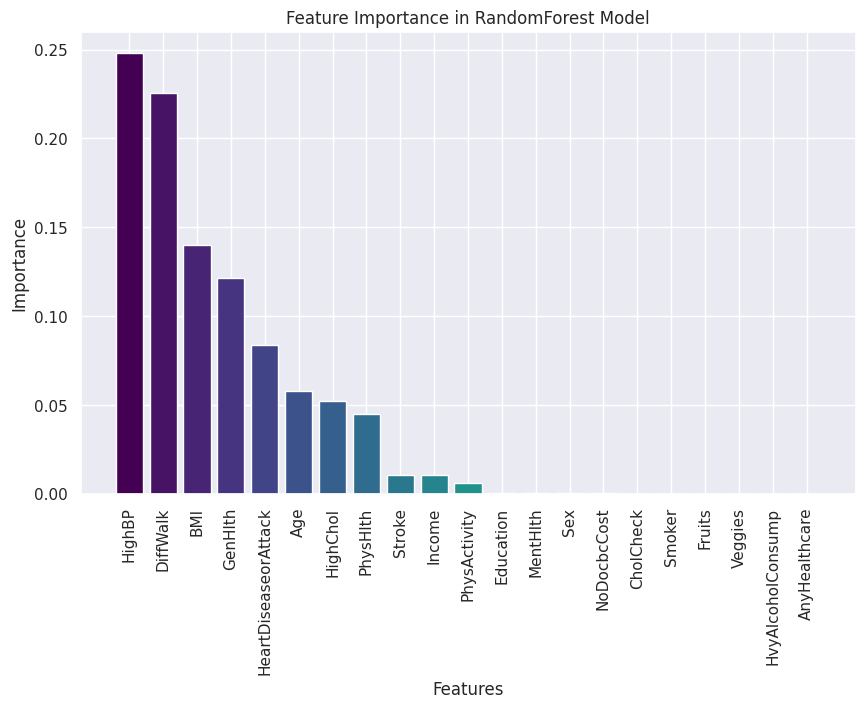

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import numpy as np

# Initializing a Spark session
spark = SparkSession.builder \
    .appName("Feature Importance with RandomForest") \
    .getOrCreate()


# Converting columns to float and fill NaN values if necessary
df2 = df2.select([col(c).cast("float").alias(c) for c in df.columns])
df2 = df2.na.fill(0)  # Example of filling NaN values if there are any

# Define the features columns ( 'Diabetes_binary' is the label)
feature_columns = [column for column in df2.columns if column != 'Diabetes_binary']

# Assembling the features into a single feature vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(df2)

# Defining label column for clarity if it's not already defined
data = data.withColumnRenamed('Diabetes_binary', 'label')

# Spliting the data into training and testing sets
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Initializing and train the RandomForest model
rf_classifier = RandomForestClassifier(featuresCol="features", labelCol="label", seed=1)
model = rf_classifier.fit(train_data)

# Getting feature importances
importances = model.featureImportances
x_values = list(range(len(importances)))

# Collecting feature importances
feature_importances = [(feature_columns[i], importances[i]) for i in x_values]
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Visualizing feature importances
labels, scores = zip(*feature_importances)
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

plt.figure(figsize=(10, 6))
plt.bar(labels, scores, color=colors)
plt.title("Feature Importance in RandomForest Model")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()

# Stop the Spark session
spark.stop()


# Decision Tree Classification using Apache Spark

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


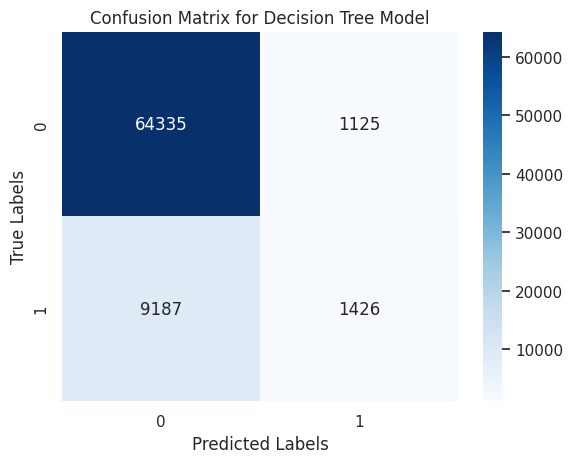

Class 0.0 Precision: 0.88
Class 0.0 Recall: 0.98
Class 0.0 F1 Score: 0.93
Class 1.0 Precision: 0.56
Class 1.0 Recall: 0.13
Class 1.0 F1 Score: 0.22
Overall Accuracy: 0.86
Weighted Precision: 0.83
Weighted Recall: 0.86
Weighted F1 Score: 0.83


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.sql.functions import col
from pyspark.mllib.evaluation import MulticlassMetrics
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("Decision Tree Classification with Detailed Metrics") \
    .getOrCreate()

# Defining the feature columns and assemble them into a feature vector
feature_columns = [col for col in df2.columns if col != 'Diabetes_binary']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
pipeline_stages = [assembler]

# Defining and add the Decision Tree Classifier to the pipeline
dt_classifier = DecisionTreeClassifier(labelCol="label", featuresCol="features")
pipeline_stages.append(dt_classifier)

# Create the pipeline
pipeline = Pipeline(stages=pipeline_stages)

# Renaming label column if necessary and split the data
data = df2.withColumnRenamed('Diabetes_binary', 'label')
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Fitting the model using the pipeline
model = pipeline.fit(train_data)

# Making predictions on the test data
predictions = model.transform(test_data)

# Converting predictions to RDD to use with MulticlassMetrics
predictionAndLabels = predictions.select("prediction", "label").rdd.map(lambda x: (float(x[0]), float(x[1])))

# Instantiating metrics object
metrics = MulticlassMetrics(predictionAndLabels)

# Confusion Matrix
confusionMatrix = metrics.confusionMatrix().toArray()

# Visualizing the Confusion Matrix
sns.heatmap(confusionMatrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

# Print metrics for each label and overall metrics
labels = predictionAndLabels.map(lambda x: x[1]).distinct().collect()
for label in sorted(labels):
    print(f"Class {label} Precision: {metrics.precision(label):.2f}")
    print(f"Class {label} Recall: {metrics.recall(label):.2f}")
    print(f"Class {label} F1 Score: {metrics.fMeasure(label):.2f}")

print(f"Overall Accuracy: {metrics.accuracy:.2f}")
print(f"Weighted Precision: {metrics.weightedPrecision:.2f}")
print(f"Weighted Recall: {metrics.weightedRecall:.2f}")
print(f"Weighted F1 Score: {metrics.weightedFMeasure():.2f}")

# Stop the Spark session
#spark.stop()


# Clustering with Apache Spark

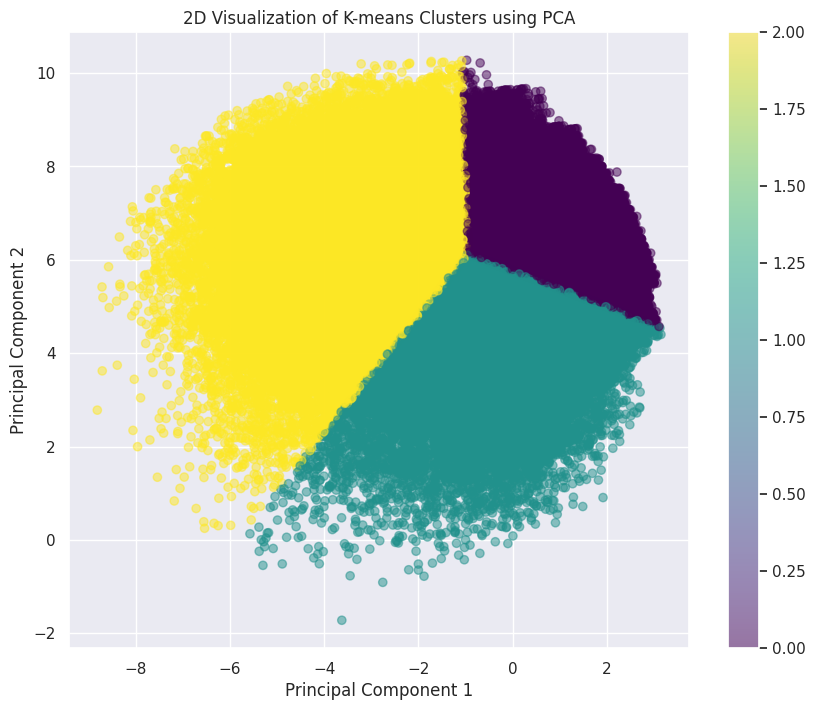

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt
import pandas as pd

# Initializing Spark Session
spark = SparkSession.builder \
    .appName("K-Means Clustering with PCA") \
    .getOrCreate()

# Loading data correctly as a Spark DataFrame
df = spark.read.csv('/content/drive/MyDrive/Big Data Sugar/cleandata.csv', header=True, inferSchema=True)

# Define the feature columns (excluding the target column if present)
feature_columns = [col for col in df.columns if col != 'Diabetes_binary']

# Assemble the features into a single feature vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Normalizing features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

# Reducing dimensionality using PCA
pca = PCA(k=2, inputCol="scaledFeatures", outputCol="pcaFeatures")

# K-means clustering
kmeans = KMeans(featuresCol="pcaFeatures", predictionCol="prediction", k=3, seed=42)

# Pipeline all steps
pipeline = Pipeline(stages=[assembler, scaler, pca, kmeans])

# Fit the model
model = pipeline.fit(df)

# Transform the data
transformed = model.transform(df)

# Collect the data to use for plotting
result_pdf = transformed.select("pcaFeatures", "prediction").toPandas()

# Extract PCA features
result_pdf['PC1'] = result_pdf['pcaFeatures'].apply(lambda x: x[0])
result_pdf['PC2'] = result_pdf['pcaFeatures'].apply(lambda x: x[1])

# Plotting the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(result_pdf['PC1'], result_pdf['PC2'], c=result_pdf['prediction'], cmap='viridis', alpha=0.5)
plt.title('2D Visualization of K-means Clusters using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()

# Stop Spark session
#spark.stop()
